In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
who_df = pd.read_csv('/content/WHO-COVID-19-global-data.csv')
expenditure_df = pd.read_excel('/content/COVID_expenditure.xlsx')
population_df = pd.read_csv('/content/Population, female (% of total population).csv')
gdp_df = pd.read_excel('/content/GDP.xlsx')
area_df = pd.read_csv('/content/area.csv')
gender_df = pd.read_csv('/content/pop.csv')

In [3]:
# Standardize country names across datasets
who_df.rename(columns={'Country': 'Country'}, inplace=True)
expenditure_df.rename(columns={'Countries': 'Country'}, inplace=True)
population_df.rename(columns={'name': 'Country'}, inplace=True)
gdp_df.rename(columns={'Country': 'Country'}, inplace=True)
area_df.rename(columns={'name': 'Country'}, inplace=True)
gender_df.rename(columns={'Economy': 'Country'}, inplace=True)

In [4]:
# Check columns in each DataFrame to confirm column names
print("WHO Global Columns:", who_df.columns)
print("Expenditure Columns:", expenditure_df.columns)
print("Population Columns:", population_df.columns)
print("GDP Columns:", gdp_df.columns)
print("Area Columns:", area_df.columns)
print("Gender Columns:", gender_df.columns)

WHO Global Columns: Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')
Expenditure Columns: Index(['Country', 'Indicators', 'Unnamed: 2', '2021'], dtype='object')
Population Columns: Index(['Economy', 'Year', 'Economy Code',
       'Population, female (% of total population)'],
      dtype='object')
GDP Columns: Index(['United States',  27360935000000,  25744108000000,  23594031000000,
        21322950000000,  21521395000000],
      dtype='object')
Area Columns: Index(['Country', 'slug', 'value', 'date_of_information', 'ranking', 'region'], dtype='object')
Gender Columns: Index(['name', 'slug', 'value', 'date_of_information', 'ranking', 'region'], dtype='object')


In [5]:
# Check columns in each DataFrame to confirm column names
who_df.rename(columns={'Country': 'Country'}, inplace=True)
expenditure_df.rename(columns={'Country': 'Country', '2021': 'Expenditure_Per_Capita_2021'}, inplace=True)
population_df.rename(columns={'Economy': 'Country', 'Population, female (% of total population)': 'Population_Female_Percent'}, inplace=True)
area_df.rename(columns={'name': 'Country', 'value': 'Area'}, inplace=True)
gender_df.rename(columns={'name': 'Country', 'value': 'Region_Size'}, inplace=True)

In [6]:
# Merge datasets sequentially on 'Country'
merged_df = who_df.merge(expenditure_df[['Country', 'Expenditure_Per_Capita_2021']], on='Country', how='left')
merged_df = merged_df.merge(population_df[['Country', 'Population_Female_Percent']], on='Country', how='left')
merged_df = merged_df.merge(area_df[['Country', 'Area']], on='Country', how='left')
merged_df = merged_df.merge(gender_df[['Country', 'Region_Size']], on='Country', how='left')

In [7]:
merged_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Expenditure_Per_Capita_2021,Population_Female_Percent,Area,Region_Size
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0,2.324045,49.488,"37,466,414","652,230"
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0,2.324045,49.488,"37,466,414","652,230"
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0,2.324045,49.488,"37,466,414","652,230"
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0,2.324045,49.488,"37,466,414","652,230"
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0,2.324045,49.488,"37,466,414","652,230"
...,...,...,...,...,...,...,...,...,...,...,...,...
60235,2024-09-22,ZW,Zimbabwe,AFRO,NaN,266393,NaN,5740,NaN,52.833,"14,829,988","390,757"
60236,2024-09-29,ZW,Zimbabwe,AFRO,0.0,266393,0.0,5740,NaN,52.833,"14,829,988","390,757"
60237,2024-10-06,ZW,Zimbabwe,AFRO,3.0,266396,0.0,5740,NaN,52.833,"14,829,988","390,757"
60238,2024-10-13,ZW,Zimbabwe,AFRO,NaN,266396,NaN,5740,NaN,52.833,"14,829,988","390,757"


In [8]:
merged_df.isnull().sum()

,0
Date_reported,0
Country_code,251
Country,0
WHO_region,4518
New_cases,15213
Cumulative_cases,0
New_deaths,15075
Cumulative_deaths,0
Expenditure_Per_Capita_2021,47941
Population_Female_Percent,14307


In [9]:
merged_df = merged_df.dropna(subset=['Country_code'])

In [10]:
merged_df['WHO_region'] = merged_df['WHO_region'].fillna(merged_df['WHO_region'].mode()[0])

In [11]:
merged_df['New_cases'] = merged_df['New_cases'].fillna(0)
merged_df['New_deaths'] = merged_df['New_deaths'].fillna(0)

In [12]:
merged_df['Expenditure_Per_Capita_2021'] = merged_df['Expenditure_Per_Capita_2021'].fillna(0)

In [13]:
merged_df['Population_Female_Percent'] = merged_df['Population_Female_Percent'].fillna(merged_df['Population_Female_Percent'].median())

In [14]:
# Remove commas from the columns and convert to numeric
merged_df['Area'] = merged_df['Area'].replace({',': ''}, regex=True).astype(float)
merged_df['Region_Size'] = merged_df['Region_Size'].replace({',': ''}, regex=True).astype(float)

In [15]:
# Now fill missing values with median
merged_df['Area'] = merged_df['Area'].fillna(merged_df['Area'].median())
merged_df['Region_Size'] = merged_df['Region_Size'].fillna(merged_df['Region_Size'].median())

In [16]:
print(merged_df.isnull().sum())

Date_reported                  0
Country_code                   0
Country                        0
WHO_region                     0
New_cases                      0
Cumulative_cases               0
New_deaths                     0
Cumulative_deaths              0
Expenditure_Per_Capita_2021    0
Population_Female_Percent      0
Area                           0
Region_Size                    0
dtype: int64


In [17]:
merged_df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths',
       'Expenditure_Per_Capita_2021', 'Population_Female_Percent', 'Area',
       'Region_Size'],
      dtype='object')

#Bar Chart

In [20]:
# Group the data by 'Country' and aggregate the total cumulative deaths
bar_data = merged_df.groupby('Country').agg({'Cumulative_deaths': 'max'}).reset_index()

# Get the top N countries based on total cumulative deaths
top_bar_data = bar_data.nlargest(10, 'Cumulative_deaths')

fig = px.bar(
    top_bar_data,
    x='Country',
    y='Cumulative_deaths',
    title="Total COVID-19 Deaths for Top 10 Countries",
    labels={'Cumulative_deaths': 'Total Deaths'}
)

fig.show()

In [21]:
merged_df['Expenditure_Per_Capita_2021'] = pd.to_numeric(merged_df['Expenditure_Per_Capita_2021'], errors='coerce')
merged_df['Population_Female_Percent'] = pd.to_numeric(merged_df['Population_Female_Percent'], errors='coerce')
merged_df['Area'] = pd.to_numeric(merged_df['Area'], errors='coerce')
merged_df['Region_Size'] = pd.to_numeric(merged_df['Region_Size'], errors='coerce')

# Group the data by 'Country' and aggregate the total cumulative deaths
bar_data = merged_df.groupby('Country').agg({
    'Cumulative_deaths': 'max',
    'Expenditure_Per_Capita_2021': 'mean',
    'Population_Female_Percent': 'mean',
    'Area': 'mean',
    'Region_Size': 'mean'
}).reset_index()

# Get the top N countries based on total cumulative deaths
top_bar_data = bar_data.nlargest(20, 'Cumulative_deaths')

fig = px.bar(
    top_bar_data,
    x='Country',
    y='Cumulative_deaths',
    title="Total COVID-19 Deaths for Top 20 Countries",
    labels={'Cumulative_deaths': 'Total Deaths'},
    hover_data={
        'Cumulative_deaths': True,
        'Expenditure_Per_Capita_2021': True,
        'Population_Female_Percent': True,
        'Area': True,
        'Region_Size': True
    }
)

fig.show()


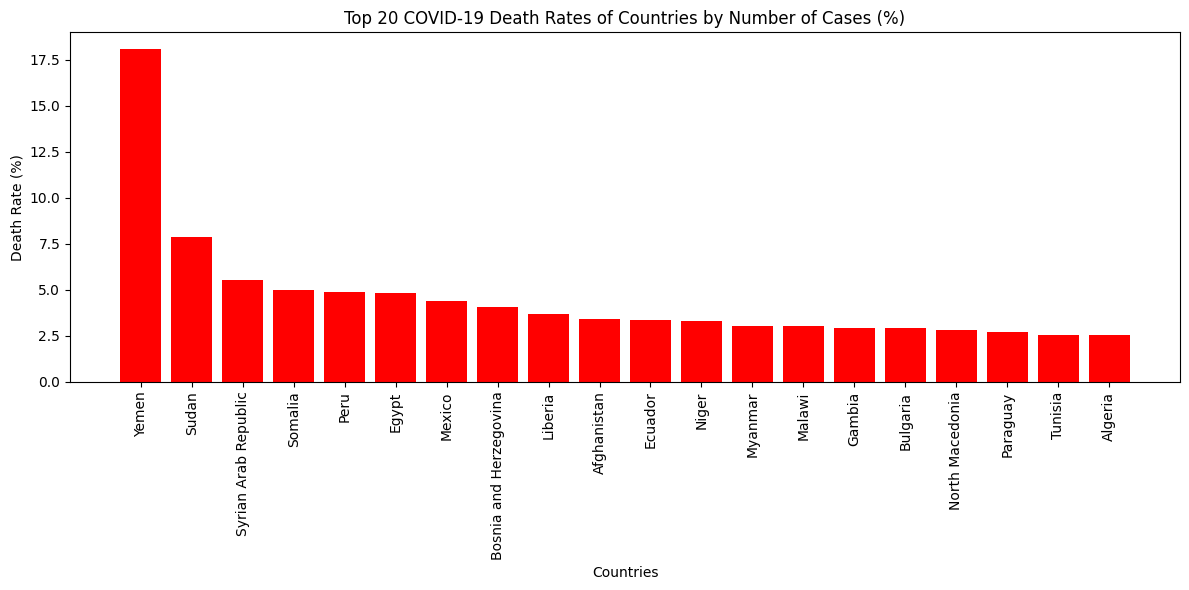

In [22]:
# Calculate the death rate for each country
merged_df['Death_rate'] = (merged_df['Cumulative_deaths'] / merged_df['Cumulative_cases']) * 100

# Aggregate data by country and take the last available value for death rate
country_deaths = merged_df.groupby('Country').agg({'Death_rate': 'last'}).reset_index()

# Sort countries by death rate in descending order
country_deaths = country_deaths.sort_values(by='Death_rate', ascending=False)

# Select the top 20 countries
top_n = 20
top_country_deaths = country_deaths.head(top_n)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_country_deaths['Country'], top_country_deaths['Death_rate'], color="red")
plt.title(f'Top {top_n} COVID-19 Death Rates of Countries by Number of Cases (%)')
plt.xlabel('Countries')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [23]:
# Calculate the death rate for each country
merged_df['Death_rate'] = (merged_df['Cumulative_deaths'] / merged_df['Cumulative_cases']) * 100

# Aggregate data by country and take the last available value for death rate
country_deaths = merged_df.groupby('Country').agg({'Death_rate': 'last'}).reset_index()

# Sort countries by death rate in descending order
country_deaths = country_deaths.sort_values(by='Death_rate', ascending=False)

# Select the top 20 countries
top_n = 20
top_country_deaths = country_deaths.head(top_n)

# Create the bar plot using Plotly
fig = px.bar(
    top_country_deaths,
    x='Country',
    y='Death_rate',
    title=f'Top {top_n} COVID-19 Death Rates by Country (%)',
    labels={'Death_rate': 'Death Rate (%)'},
    color='Death_rate',
    color_continuous_scale='Reds',
)

fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()

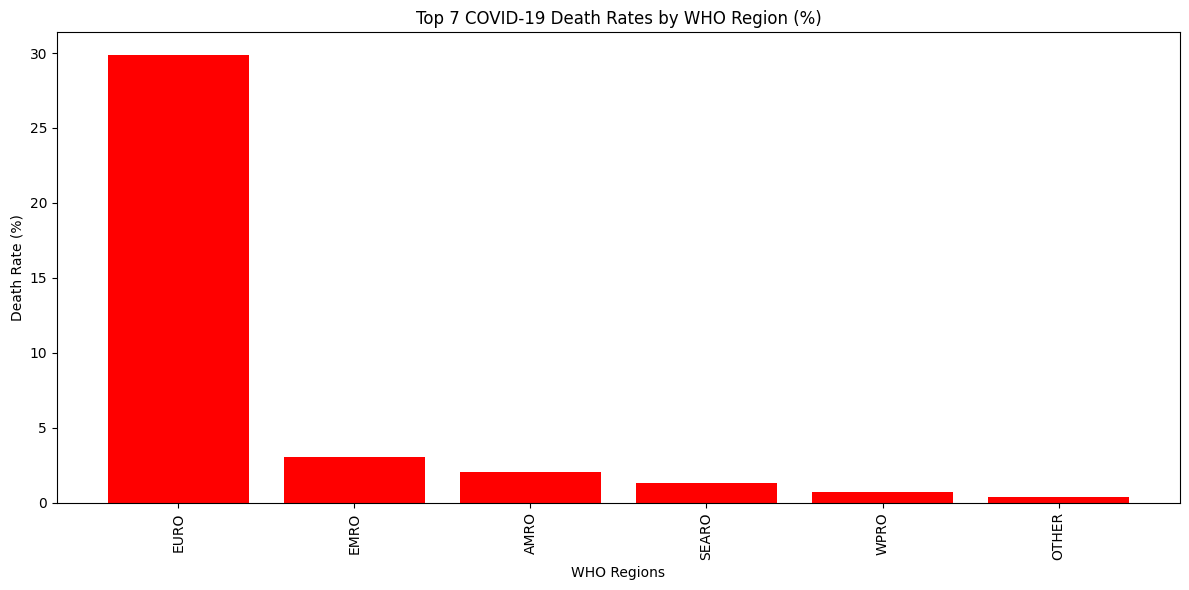

In [24]:
# Calculate the death rate for each entry in the dataset
merged_df['Death_rate'] = (merged_df['Cumulative_deaths'] / merged_df['Cumulative_cases']) * 100

# Aggregate data by region and calculate the mean death rate for each region
region_deaths = merged_df.groupby('WHO_region').agg({'Death_rate': 'mean'}).reset_index()

# Sort regions by death rate in descending order
region_deaths = region_deaths.sort_values(by='Death_rate', ascending=False)

top_n = 7
top_region_deaths = region_deaths.head(top_n)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_region_deaths['WHO_region'], top_region_deaths['Death_rate'], color="red")
plt.title(f'Top {top_n} COVID-19 Death Rates by WHO Region (%)')
plt.xlabel('WHO Regions')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# Calculate the death rate for each entry in the dataset
merged_df['Death_rate'] = (merged_df['Cumulative_deaths'] / merged_df['Cumulative_cases']) * 100

# Aggregate data by region and calculate the mean death rate for each region
region_rate = merged_df.groupby('WHO_region').agg({'Death_rate': 'mean'}).reset_index()

# Create the bar plot using Plotly
fig = go.Figure(go.Bar(
    x=region_rate['WHO_region'],
    y=region_rate['Death_rate'],
    marker=dict(color='red'),
))

# Update layout for better presentation
fig.update_layout(
    title="Deaths Rates of Regions by Number of Cases (%)",
    xaxis_title="Regions",
    yaxis_title="Death Rate (%)",
    xaxis_tickangle=-45,
    showlegend=False
)

# Show the figure
fig.show()

In [26]:
# Calculate the number of survivors by subtracting cumulative deaths from cumulative cases
merged_df['Survivors'] = merged_df['Cumulative_cases'] - merged_df['Cumulative_deaths']

In [27]:
# Group by Country and calculate total survivors
survivors_data = merged_df.groupby('Country').agg({'Survivors': 'max'}).reset_index()

# Sort countries based on survivors
top_survivors_data = survivors_data.nlargest(20, 'Survivors')

# Create the bar chart
fig = px.bar(
    top_survivors_data,
    x='Country',
    y='Survivors',
    title="Top 20 Countries with Most COVID-19 Survivors",
    labels={'Survivors': 'Number of Survivors'},
    color='Survivors',
    color_continuous_scale='Viridis'
)

# Show the figure
fig.show()

In [28]:
# Aggregate survivors by region
region_survivors = merged_df.groupby('WHO_region').agg({'Survivors': 'sum'}).reset_index()

# Create the bar chart for survivors by region
fig = px.bar(
    region_survivors,
    x='WHO_region',
    y='Survivors',
    title="Total COVID-19 Survivors by Region",
    labels={'Survivors': 'Number of Survivors'},
    color='Survivors',
    color_continuous_scale='Viridis'
)

fig.show()